# Hypothesis Testing
### Dataset used - NYC Weather dataset
#### Null hypothesis - The weather in New York city in the last week of January in 2019 was not different from the rest of the year
#### Alternate Hypothesis - The weather in New York city in the last week of January in 2019 was different from the rest of the year

$ H0  : mu = 40.5 $ <br>
$ H1  : mu != 40.5 $ 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
data = pd.read_csv('nyc_temperature.csv')

In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data

,date,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
0,2019-01-01,60,40,50.0,13.9,15,0,0.08,0,0
1,2019-02-01,41,35,38.0,2.1,27,0,0,0,0
2,2019-03-01,45,39,42.0,6.3,23,0,T,0,0
3,2019-04-01,47,37,42.0,6.5,23,0,0,0,0
4,2019-05-01,47,42,44.5,9.1,20,0,0.45,0,0
...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,54,42,48.0,10.8,17,0,T,0,0
361,2019-12-28,50,44,47.0,10.0,18,0,0,0,0
362,2019-12-29,44,38,41.0,4.3,24,0,0.29,0,0
363,2019-12-30,43,38,40.5,4.0,24,0,0.49,0,0


In [5]:
population = data.loc[(data['date'] >= '2019-1-01')
                     & (data['date'] < '2019-1-31')]
len(population)

30

In [6]:
sample = data.loc[(data['date'] >= '2019-1-25')
                     & (data['date'] < '2019-1-31')]

In [7]:
xbar = sample['tavg'].mean()    #31.91666
mu = population['tavg'].mean()  #42.64583
sigma = population['tavg'].std()    #19.67423
n = len(population)     #24
alpha = 0.05

In [8]:
z_crit = abs(st.norm.ppf(alpha/2))
z_crit

1.9599639845400545

In [29]:
z = (xbar-mu)/(sigma/np.sqrt(n))
z

-2.5797636171736453

In [10]:
if(abs(z) > z_crit):
    print('Null hypothesis can be rejected due to sufficient evidence')
    print('i.e. The weather in the last week of the month of january was significantly different from the rest of the month')
else:
    print('Null hypothesis cannot be rejected due to insufficient evidence')
    print('i.e. The weather in the last week of the month of january was "NOT" different from the rest of the month')


Null hypothesis can be rejected due to sufficient evidence
i.e. The weather in the last week of the month of january was significantly different from the rest of the month


In [11]:
print(xbar,mu,sigma,n)

31.916666666666668 40.5 18.223705668053963 30


In [12]:
p_value = (1-st.norm.cdf(abs(1.96)))*2
p_value

0.04999579029644097

In [14]:
data.sample(n=100,replace=True)

,date,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
329,2019-11-26,60,44,52.0,6.3,13,0,0,0,0
114,2019-04-25,63,49,56.0,-1.2,9,0,0.01,0,0
257,2019-09-15,85,71,78.0,6.8,0,13,0,0,0
256,2019-09-14,78,63,70.5,-1.0,0,6,0,0,0
2,2019-03-01,45,39,42.0,6.3,23,0,T,0,0
...,...,...,...,...,...,...,...,...,...,...
143,2019-05-24,74,63,68.5,2.4,0,4,0,0,0
329,2019-11-26,60,44,52.0,6.3,13,0,0,0,0
101,2019-12-04,66,45,55.5,3.1,9,0,0.48,0,0
95,2019-06-04,66,39,52.5,2.5,12,0,T,0,0


In [26]:
t_crit = st.t.ppf(0.05,n-1)

In [27]:
t = (xbar-mu)/sigma/np.sqrt(sample['tavg'].std())
t

-0.19344775652478896

In [28]:
if(abs(t) < abs(t_crit)):
    print('Null hypothesis cannot be rejected')
else:
    print('Null hypothesis can be rejected')

Null hypothesis cannot be rejected


In [31]:
print(population['tavg'].std(),sample['tavg'].std())

18.223705668053963 5.928040710611446


In [35]:
a = np.zeros(100)
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
arr = np.random.binomial(100,0.26,100)

In [45]:
import matplotlib.pyplot as plt

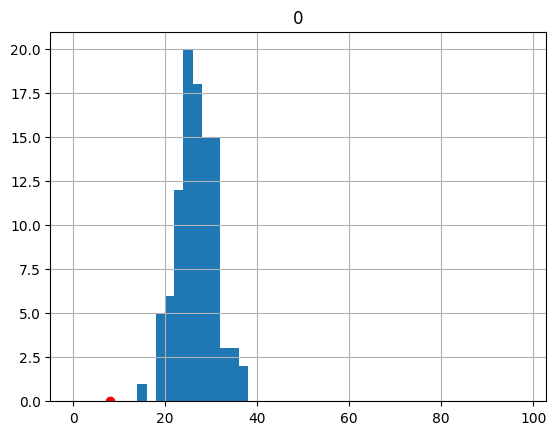

In [48]:
arr = pd.DataFrame(arr)
arr.hist(bins=np.arange(0,100,2))
plt.scatter(8,0,color = 'red')